# look at training of deep cell network
12/01/17: 
- I used a black and white mask for nuclei channel and fluorescent images for cell channel
- I used deepcell_covert_env to make training data npz
- I used deepcellkeras1_env to train network
- 2 models trained over the weekend, both had barely any change in accuracy and loss was 'nan' I'm not sure why

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def get_loss_dict(loss_file):
    ll = np.load(loss_file)
    l = ll['loss_history']
    loss = l.any()

    return loss

In [13]:
def plot_accuracy(loss, save_name=None, exp_name=None):
    plt.plot(loss['acc'])
    plt.plot(loss['val_acc'])
    plt.title('Model Accuracy')
    if exp_name:
        plt.suptitle(exp_name)
    plt.ylabel('Classification Accuracy')
    plt.xlabel('Training Epoch')
    plt.legend(['Training', 'Validation'], loc='center right')
    plt.show()
    if save_name:
        plt.savefig(save_name)

In [7]:
def plot_loss(loss, save_name=None, exp_name=None):
    plt.plot(loss['loss'])
    plt.plot(loss['val_loss'])
    plt.title('Model Loss')
    if exp_name:
        plt.suptitle(exp_name)
    plt.ylabel('Loss')
    plt.xlabel('Training Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()
    if save_name:
        plt.savefig(save_name)

In [8]:
loss_file='/home/amandap/DeepCellKimmel/trained_networks/2017-12-01_AT22LA_all_61x61_20171201_AT22LA_bn_feature_net_61x61_0.npz'
loss=get_loss_dict(loss_file)

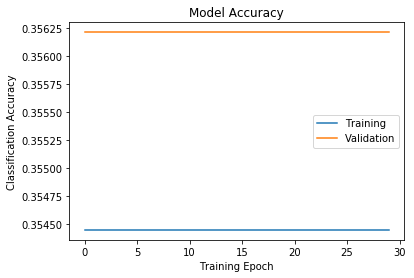

In [14]:
plot_accuracy(loss)

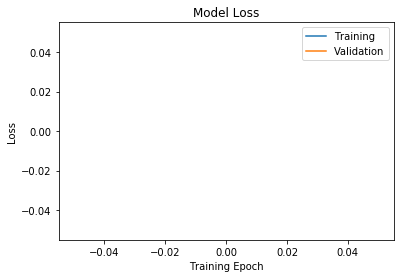

In [15]:
plot_loss(loss)

In [17]:
loss_file='/home/amandap/DeepCellKimmel/trained_networks/2017-12-02_AT22LA_all_61x61_20171201_AT22LA_bn_feature_net_61x61_1.npz'
loss=get_loss_dict(loss_file)

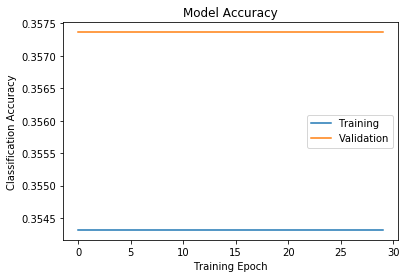

In [18]:
plot_accuracy(loss)

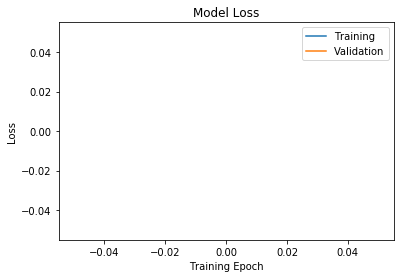

In [19]:
plot_loss(loss)

I have no idea what happened. will have to retrace my steps and try again. 2 ideas:
- is data zero-centered?
- does the black and white nuclear channel mess everything up? I don't know why it would. 

Try:
- check if data is zero centered and remake if not
- remake data with jacob's code
- train again without nuclear channel info

update: after looking at training data i saw that the nuclear channel (ones and zero's since just a mask) was being recast to nan's during normalization. I fixed this and will now run again. 